<a href="https://colab.research.google.com/github/madhurendra0089/Assignment/blob/main/Visualisation_fMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import nibabel as nib
from nilearn.image import load_img, index_img
from nilearn import datasets, image, plotting
from nilearn.maskers import NiftiMasker
from scipy import ndimage
import matplotlib.pyplot as plt
from nilearn import plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

In [ ]:
# directory and path
path = 'C:/Users/Madhurendra/Downloads/alzheimer'

Filtered_4DVolume  = '/Filtered_4DVolume.nii'
extracted_image    = '/extracted_image.nii.gz'
motion_image       = '/motion_image.nii.gz'
normalized_image   = '/normalized_image.nii.gz'
sliced_image       = '/sliced_image.nii.gz'
smooth_image       = '/smooth_image.nii.gz'
temporal_image     = '/temporal_image.nii.gz'

nifti_Filtered = nib.load(path+Filtered_4DVolume)
fmri_Filtered = nifti_Filtered.get_fdata()

nifti_extracted = nib.load(path+extracted_image)
fmri_extracted = nifti_extracted.get_fdata()

nifti_motion = nib.load(path+motion_image)
fmri_motion = nifti_motion.get_fdata()

nifti_normalized = nib.load(path+normalized_image)
fmri_normalized = nifti_normalized.get_fdata()

nifti_sliced = nib.load(path+sliced_image)
fmri_sliced = nifti_sliced.get_fdata()

nifti_smooth = nib.load(path+smooth_image)
fmri_smooth = nifti_smooth.get_fdata()

nifti_temporal = nib.load(path+temporal_image)
fmri_temporal = nifti_temporal.get_fdata()

In [ ]:
dir_AD = path+'/AD/'
dir_NC = path+'/NC/'
dir_MCI = path+'/MCI/'

## Visualisation
time-series of a voxel

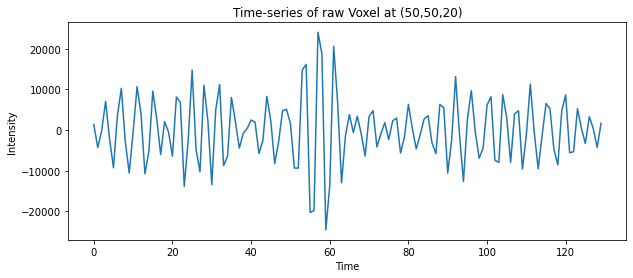

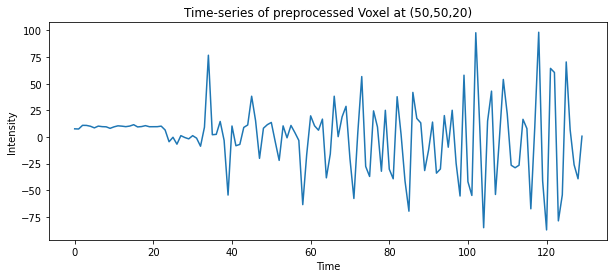

In [ ]:
voxel_coords=(50,50,20)
time_series = fmri_Filtered[voxel_coords[0], voxel_coords[1], voxel_coords[2], :]
plt.figure(figsize=(10,4))
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Time-series of raw Voxel at (50,50,20)')
plt.show()

time_series = fmri_temporal[voxel_coords[0], voxel_coords[1], voxel_coords[2], :]
plt.figure(figsize=(10,4))
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Time-series of preprocessed Voxel at (50,50,20)')
plt.show()

fMRI Image in different Preprocessing Stage

In [ ]:
def image_stage(fmri_data):
    slice_idx = 20
    plt.figure(figsize=(15, 15))
    plt.subplot(131)
    plt.imshow(fmri_data[:, :, slice_idx, 0], cmap='gray', origin='lower')
    plt.title(f'XY-fMRI Slice {slice_idx}')

    plt.subplot(132)
    plt.imshow(fmri_data[:, slice_idx, :, 0], cmap='gray', origin='lower')
    plt.title(f'XZ-fMRI Slice {slice_idx}')

    plt.subplot(133)
    plt.imshow(fmri_data[:, slice_idx, :, 0], cmap='gray', origin='lower')
    plt.title(f'YZ-fMRI Slice {slice_idx}')

    plt.show()
    plt.tight_layout()

Filtered image


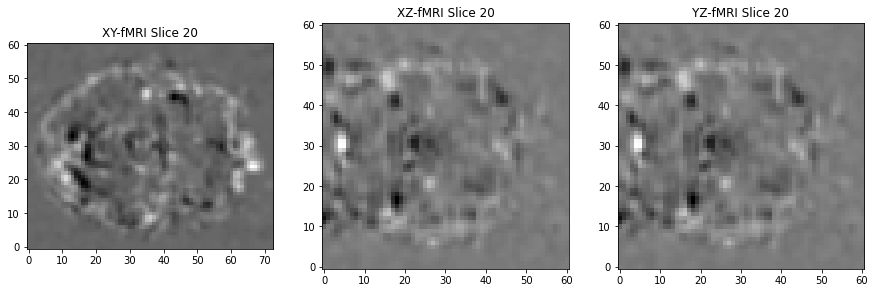

extracted image


<Figure size 432x288 with 0 Axes>

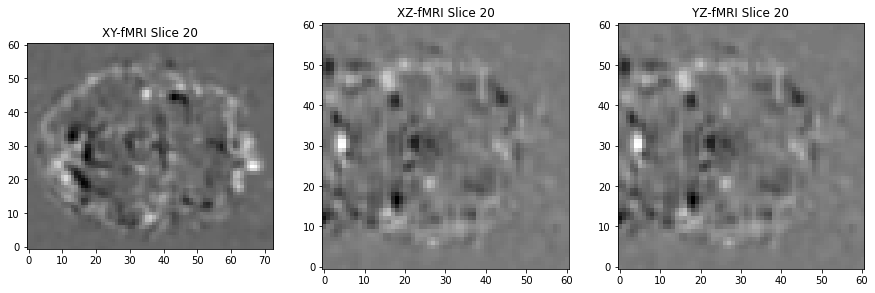

motion filtered image


<Figure size 432x288 with 0 Axes>

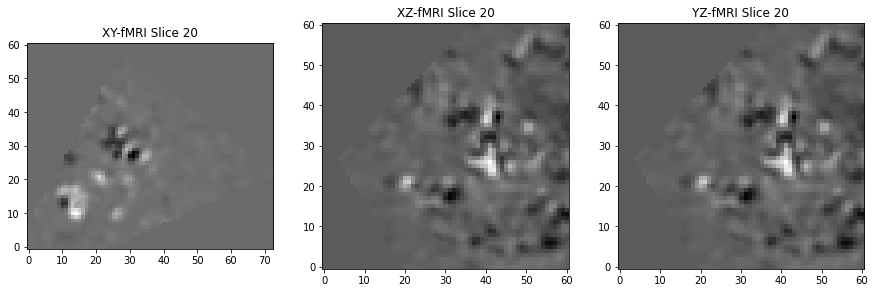

slicedimage


<Figure size 432x288 with 0 Axes>

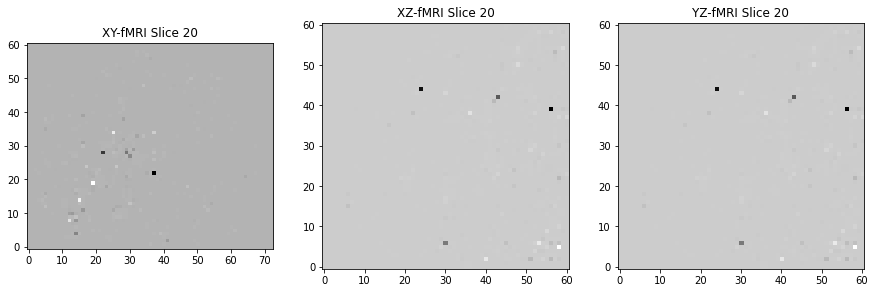

normalized image


<Figure size 432x288 with 0 Axes>

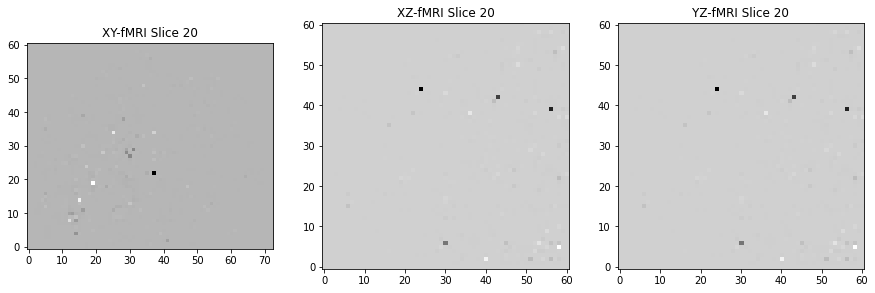

smoothened image


<Figure size 432x288 with 0 Axes>

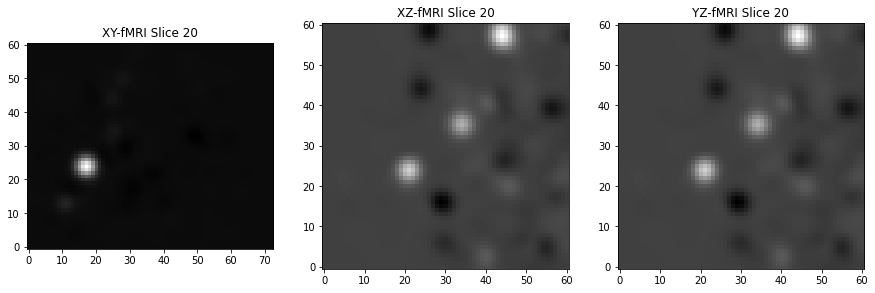

temporal image


<Figure size 432x288 with 0 Axes>

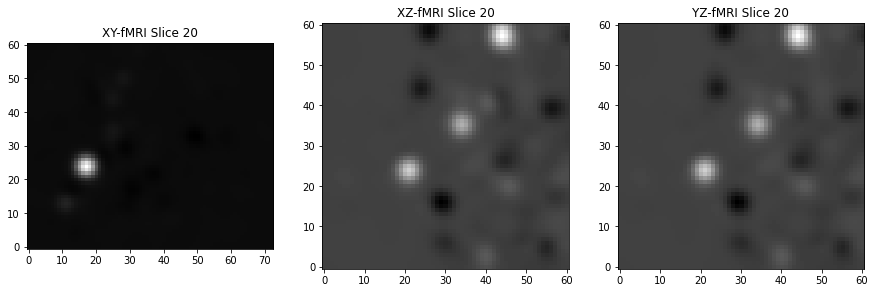

<Figure size 432x288 with 0 Axes>

In [ ]:
print('Filtered image')
image_stage(fmri_Filtered)
print('extracted image')
image_stage(fmri_extracted)
print('motion filtered image')
image_stage(fmri_motion)
print('slicedimage')
image_stage(fmri_sliced)
print('normalized image')
image_stage(fmri_normalized)
print('smoothened image')
image_stage(fmri_smooth)
print('temporal image')
image_stage(fmri_temporal)

In [ ]:
def time_series_slides(fmri_data):
    for slice_idx in range(0, 30):
        plt.figure(figsize=(15, 15))
        plt.subplot(131)
        plt.imshow(fmri_data[:, :, slice_idx, 0], cmap='gray', origin='lower')
        plt.title(f'XY-fmri_data slice {slice_idx}')

C:\Users\Madhurendra\AppData\Local\Temp\ipykernel_20408\4002670518.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 15))


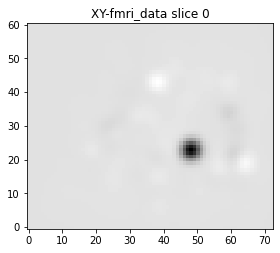

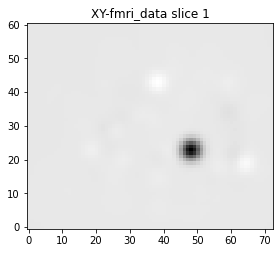

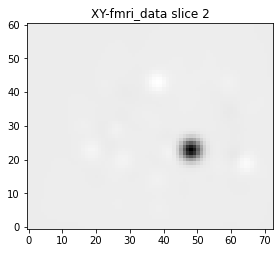

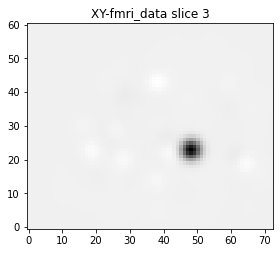

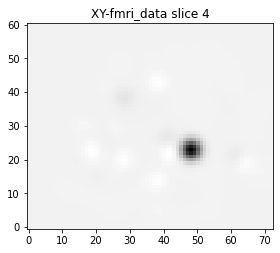

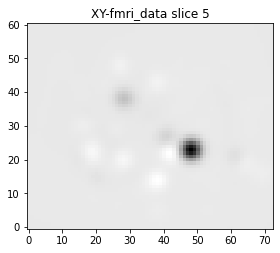

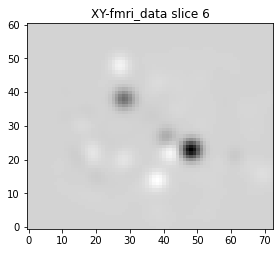

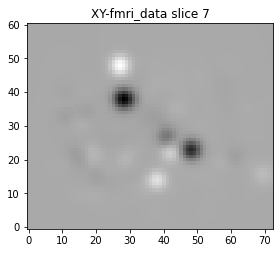

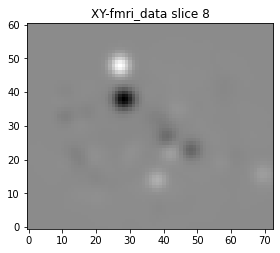

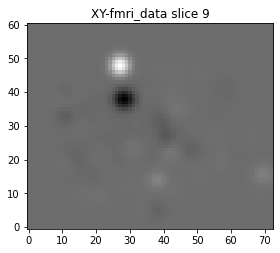

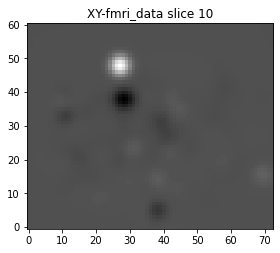

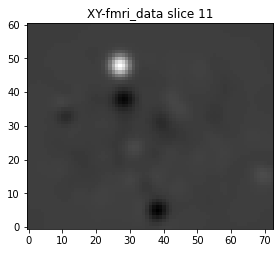

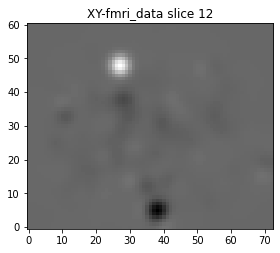

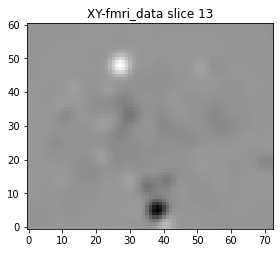

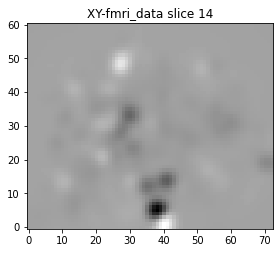

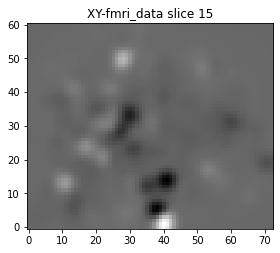

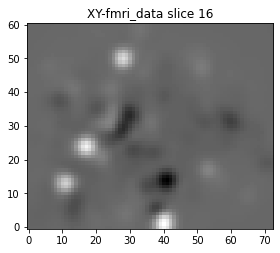

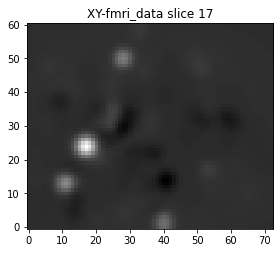

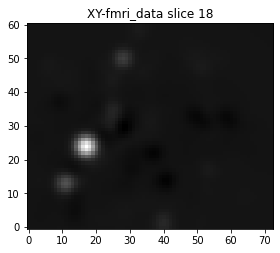

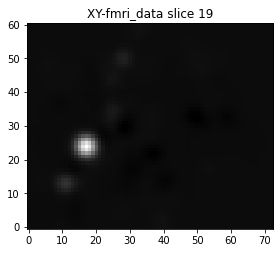

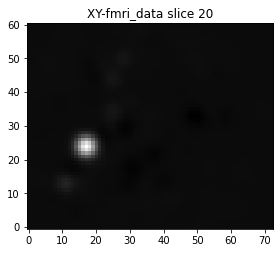

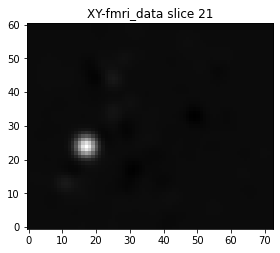

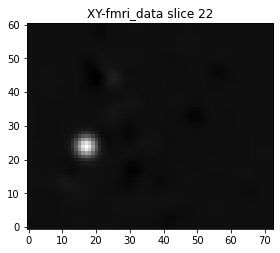

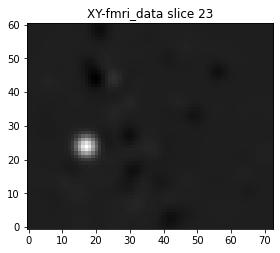

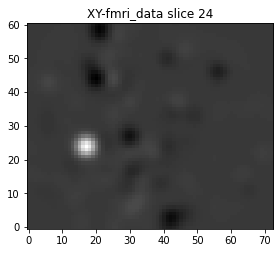

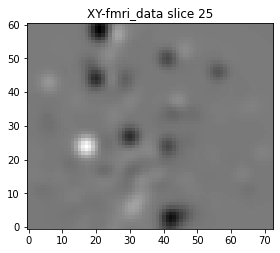

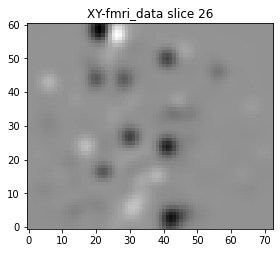

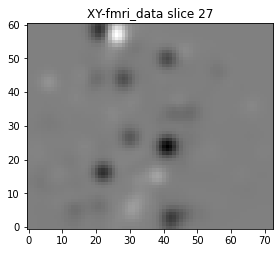

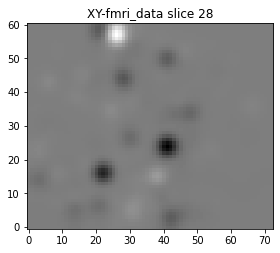

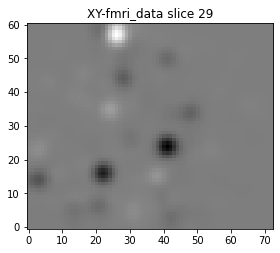

In [ ]:
time_series_slides(fmri_temporal)

C:\Users\Madhurendra\AppData\Local\Temp\ipykernel_20408\4002670518.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 15))


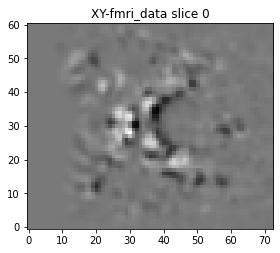

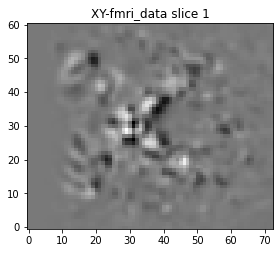

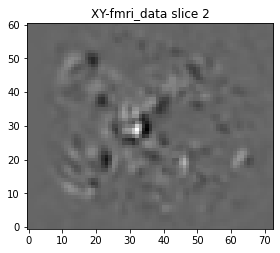

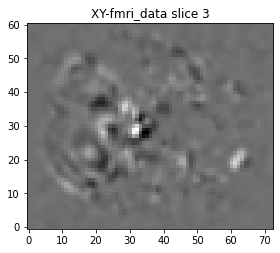

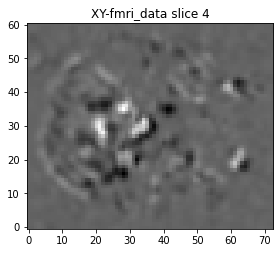

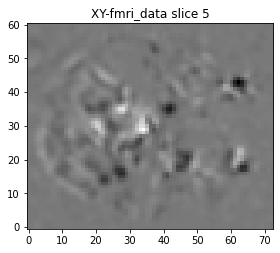

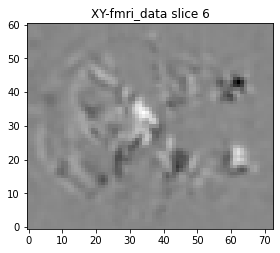

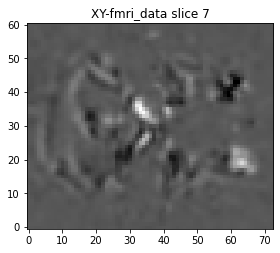

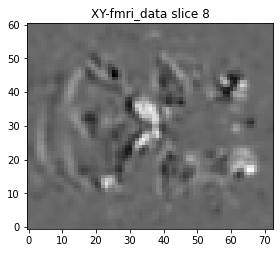

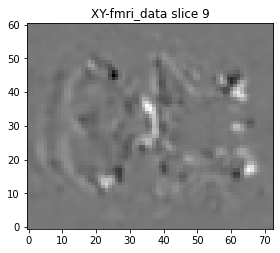

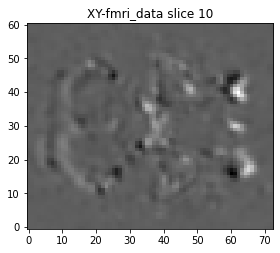

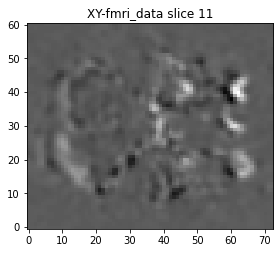

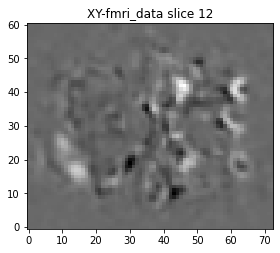

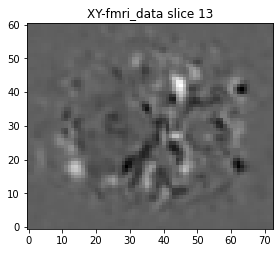

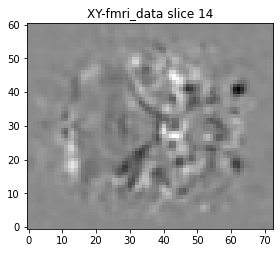

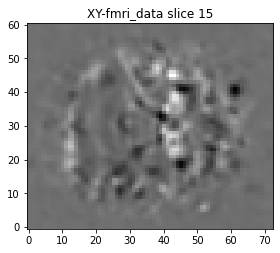

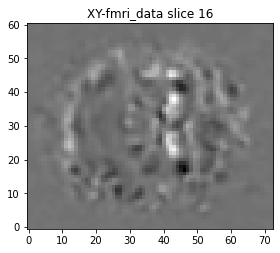

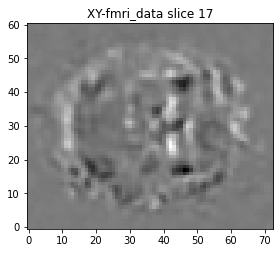

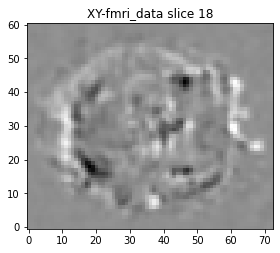

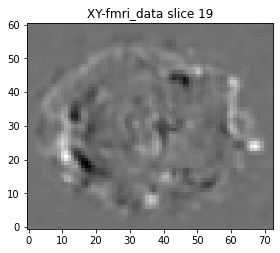

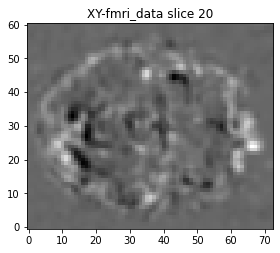

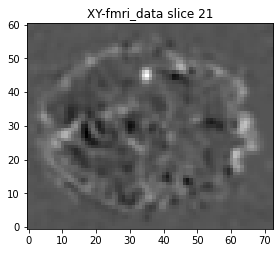

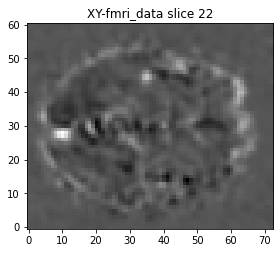

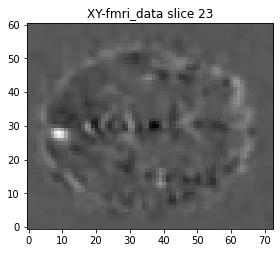

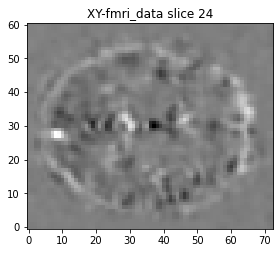

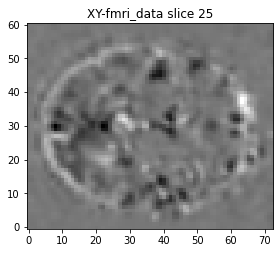

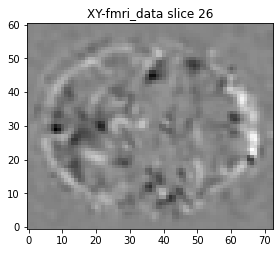

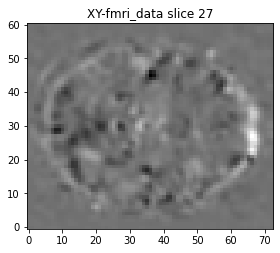

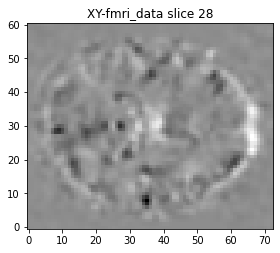

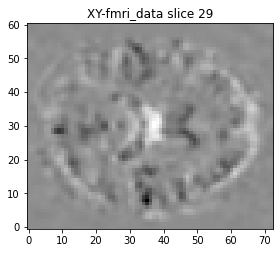

In [ ]:
time_series_slides(fmri_Filtered)

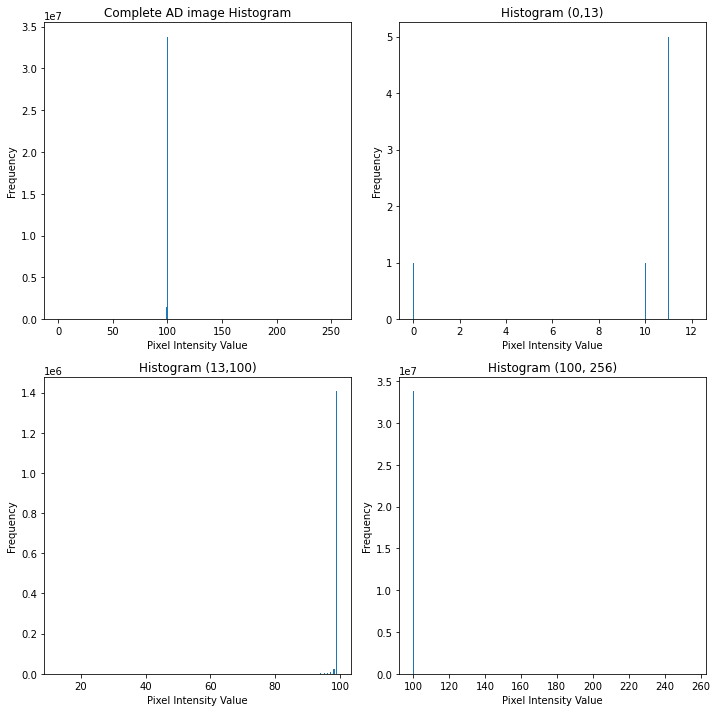

In [ ]:
x=np.unique(fmri_temporal)
image = (fmri_temporal-x[0])/(x[-1]-x[0])*255
histogram = np.histogram(image, bins=256)

# Sample data points and their corresponding frequencies (replace these with your actual data)
data_points1 = [x for x in range(256)]
data_points2 = [x for x in range(13)]
data_points3 = [x for x in range(13,100)]
data_points4 = [x for x in range(100,256)]
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.hist(data_points1, bins=255, weights=histogram[0])
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')
plt.title('Complete AD image Histogram')

plt.subplot(222)
plt.hist(data_points2, bins=255, weights=histogram[0][0:13])
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram (0,13)')

plt.subplot(223)
plt.hist(data_points3, bins=255, weights=histogram[0][13:100])
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram (13,100)')

plt.subplot(224)
plt.hist(data_points4, bins=255, weights=histogram[0][100:256])
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')
plt.title('Histogram (100, 256)')


plt.tight_layout()
plt.show()

In [ ]:
x = np.unique(fmri_temporal).shape


(31281077,)

In [ ]:
image = (image-x[0]/x[-1]-x[0])*255


In [ ]:
np.histogram(image, bins=256)

(array([       1,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        1,        5,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        4,        8,        0,
               0,        0,        0,        0,        0,        1,
               4,        4,        0,        0,        0,        0,
               0,        6,        1,        5,        0,        0,
               0,        0,        8,        9,       19,        0,
               0,        0,        0,       12,       20,        0,
               0,        1,        0,        5,        0,        0,
               5,        6,       18,        9,        2,        8,
              28,       21,       13,        4,        2,       24,
              16,       14,       29,       13,       42,       28,
              27,       57,       33,       64,       74,       69,
              70,       90,      114,      196, 

In [ ]:

folderpath = '/content/drive/MyDrive/MRI Pritam/DATASET/'
def process_scan(path):
    """Read and extract volume"""
    img = nib.load(path)              # Get raw data
    img = img.get_fdata()             #Extract Image Data

    """Normalize the volume"""
    img = (img-np.min(img))/(np.max(img)-np.min(img))

    return img


def extract_features(image):
    image = process_scan(image)
    x=np.unique(image)
    image = (image-x[0]/x[-1]-x[0])*255
    # Calculate the intensity histogram of the image
    histogram = np.histogram(image, bins=256)

    # Return the intensity histogram as a feature vector
    return histogram[0]


In [ ]:
extract_features(path+Filtered_4DVolume)

array([       1,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        1,        0,
              0,        1,        1,        0,        0,        0,
              1,        2,        0,        0,        0,        1,
              2,        0,        2,        1,        0,        0,
              0,        1,        1,        1,        0,        1,
              0,        2,        0,        1,        5,        1,
              4,        4,        2,        8,        3,        3,
              8,       10,        3,        5,        4,        1,
              8,        7,        8,       12,        6,       15,
             12,       16,       13,       13,       21,       26,
             30,       23,       32,       40,       39,       45,
             55,       62,       66,       80,       98,      106,
             95,      105,      151,      151,      179,      203,
            255,      249,      290,      339,      387,      

In [ ]:

def tunnel(filepath, n):
    """preprocess one folder"""

    #list of files
    after_scan = [os.path.join(os.getcwd(), filepath, x) for x in os.listdir(filepath)]
    after_process = np.array([extract_features(path) for path in after_scan])

    #ADD Labeling
    labels = np.array([n for _ in range(len(after_process))])

    return after_process, labels

def bigger_tunnel(path):
    """preprocess Daddy folder"""

    #Process each folder through tunnel function
    ad_image, ad_labels   = tunnel(folderpath+path+'/AD', 1)
    nc_image, nc_labels   = tunnel(folderpath+path+'/NC', 0)

    #Concatenate to make complete set of train, test or validation
    x = np.concatenate(( ad_image[:],  nc_image[:]),axis=0)
    y = np.concatenate((ad_labels[:], nc_labels[:]), axis=0)

    return x,y

    #######################